In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
traindata= pd.read_csv('D:/2243_9243_bundle_archive/fashion-mnist_train.csv',sep=",")

In [5]:
testdata= pd.read_csv('D:/2243_9243_bundle_archive/fashion-mnist_test.csv',sep=",")

In [7]:
traindata.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
training = np.array(traindata,dtype='float32')
testing = np.array(testdata,dtype='float32')

4.0

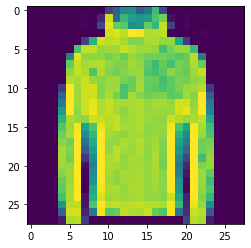

In [35]:
import random as r
i = r.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

In [11]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
xtrain = training[:,1:]/255
ytrain = training[:,0]

In [12]:
xtest = testing[:,1:]/255
ytest = testing[:,0]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain,xvalidate,ytrain,yvalidate=train_test_split(xtrain,ytrain,test_size=0.2,random_state=12345)

In [15]:
xtrain = xtrain.reshape(xtrain.shape[0],*(28,28,1))
xtest = xtest.reshape(xtest.shape[0],*(28,28,1))
xvalidate = xvalidate.reshape(xvalidate.shape[0],*(28,28,1))

In [18]:
xvalidate.shape

(12000, 28, 28, 1)

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense,Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [23]:
cnnmodel= Sequential()

In [25]:
cnnmodel.add(Conv2D(32,3,3,input_shape=(28,28,1),activation = 'relu'))

In [26]:
cnnmodel.add(MaxPooling2D(pool_size=(2,2)))

In [27]:
cnnmodel.add(Flatten())

In [34]:
cnnmodel.add(Dense(32, activation = 'relu'))

In [36]:
cnnmodel.add(Dense(10 , activation = 'sigmoid'))

In [39]:
cnnmodel.compile(loss='sparse_categorical_crossentropy',optimizer = Adam(lr=0.001), metrics=['accuracy'])

In [41]:
epochs=50

In [44]:
cnnmodel.fit(xtrain,ytrain,batch_size=512,epochs=50,verbose=1,validation_data=(xvalidate,yvalidate))

Epoch 1/50
94/94 [==============================] - 27s 287ms/step - loss: 2.2620 - accuracy: 0.1652 - val_loss: 2.1469 - val_accuracy: 0.2963
Epoch 2/50
94/94 [==============================] - 3s 31ms/step - loss: 2.0280 - accuracy: 0.3790 - val_loss: 1.9140 - val_accuracy: 0.4694
Epoch 3/50
94/94 [==============================] - 3s 33ms/step - loss: 1.8235 - accuracy: 0.5065 - val_loss: 1.7295 - val_accuracy: 0.5499
Epoch 4/50
94/94 [==============================] - 3s 31ms/step - loss: 1.6451 - accuracy: 0.5654 - val_loss: 1.5555 - val_accuracy: 0.6062
Epoch 5/50
94/94 [==============================] - 3s 31ms/step - loss: 1.4857 - accuracy: 0.6050 - val_loss: 1.4121 - val_accuracy: 0.6382
Epoch 6/50
94/94 [==============================] - 3s 32ms/step - loss: 1.3501 - accuracy: 0.6787 - val_loss: 1.2850 - val_accuracy: 0.7218
Epoch 7/50
94/94 [==============================] - 3s 31ms/step - loss: 1.2384 - accuracy: 0.7247 - val_loss: 1.1862 - val_accuracy: 0.7305
Epoch 8/50


In [46]:
evaluation = cnnmodel.evaluate(xtest,ytest)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.4680 - accuracy: 0.8373
Test Accuracy : 0.837


In [49]:
predictclass = cnnmodel.predict_classes(xtest)

In [51]:
predictclass

array([0, 1, 2, ..., 8, 8, 4], dtype=int64)

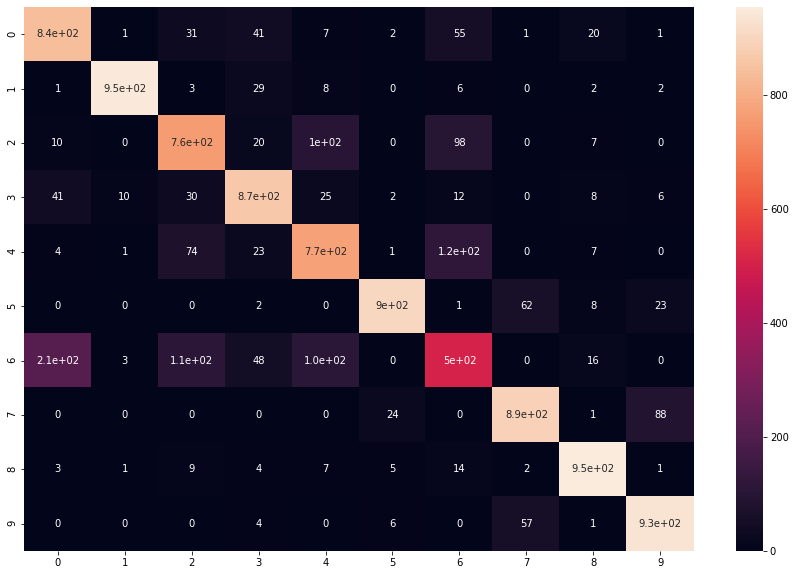

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,predictclass)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

In [55]:
from sklearn.metrics import classification_report
classes=10
targetnames = ['class {}'.format(i) for i in range(classes)]

print(classification_report(ytest,predictclass,target_names=targetnames))

              precision    recall  f1-score   support

     class 0       0.75      0.84      0.80      1000
     class 1       0.98      0.95      0.97      1000
     class 2       0.75      0.76      0.75      1000
     class 3       0.84      0.87      0.85      1000
     class 4       0.75      0.77      0.76      1000
     class 5       0.96      0.90      0.93      1000
     class 6       0.63      0.50      0.56      1000
     class 7       0.88      0.89      0.88      1000
     class 8       0.93      0.95      0.94      1000
     class 9       0.89      0.93      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

